In [10]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Pair Programming Intro Machine Learning

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [11]:
df = pd.read_csv("archivos/cost-of-living_v2.csv")
df.head(2)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,2.20,2.85,3.53,4.04,11.54,10.58,41.61,6.77,3.71,6.50,6.19,3.84,2.92,2.45,1.05,15.36,2.12,2.36,3.46,1.00,42.25,2.92,0.92,9.22,1.43,29192.75,27840.35,182.13,0.16,22.48,55.88,18.33,9.60,404.15,17902.55,58.26,46.36,70.81,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,2.74,2.61,1.22,2.22,18.35,4.86,13.12,2.26,1.60,2.19,1.53,0.84,1.04,0.83,0.64,14.24,0.94,1.97,3.56,0.57,28.47,2.14,0.43,8.54,1.20,19929.68,20750.95,66.00,0.03,17.07,63.49,14.95,8.54,1382.62,26379.45,70.49,34.92,88.21,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1


In [12]:
df.sample(20)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
3359,Alotau,Papua New Guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2612,Mukacheve,Ukraine,2.18,9.52,4.42,0.76,0.95,0.41,0.33,0.22,0.76,0.41,0.76,0.91,4.08,2.99,3.94,0.27,0.76,0.90,0.41,0.27,0.22,0.49,0.33,2.18,0.62,0.95,2.18,0.16,6.80,0.95,0.19,1.63,0.76,16018.68,15869.10,69.04,0.03,3.33,10.74,3.94,2.72,132.58,1994.40,21.76,25.16,36.58,60.92,231.17,163.18,271.96,176.78,489.54,380.75,387.55,13.10,0
4634,Crawfordsville,United States,15.00,80.00,8.50,4.00,7.00,5.00,2.50,1.99,0.92,2.20,2.20,3.59,9.92,5.51,6.61,3.97,4.41,4.41,3.86,2.76,2.62,1.50,1.50,10.50,2.36,1.95,9.00,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN,377.50,NaN,120.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.00,750.00,1500.00,2000.00,NaN,NaN,NaN,NaN,0
2792,Mount Vernon,United States,20.00,65.00,8.00,5.00,7.00,4.33,2.72,2.32,0.79,3.30,3.86,3.49,8.26,17.88,20.57,4.40,2.59,3.31,3.75,4.04,3.73,2.00,1.99,10.99,3.15,1.65,15.00,2.75,NaN,4.38,1.86,30.00,1.29,25000.00,23754.86,86.00,0.10,69.77,60.00,NaN,18.00,1230.00,40384.62,62.13,37.50,95.29,90.00,1800.00,NaN,3000.00,2500.00,NaN,NaN,2954.00,5.40,0
3781,Corvallis,United States,16.00,55.00,8.00,6.00,6.00,3.67,2.00,2.00,0.58,NaN,3.53,NaN,14.33,NaN,NaN,2.79,1.40,2.20,2.20,1.10,1.54,NaN,NaN,12.00,NaN,NaN,10.00,0.00,0.00,NaN,NaN,25.00,1.40,19922.50,22426.00,117.42,0.09,82.67,25.00,NaN,11.50,1200.00,15000.00,41.25,51.67,75.00,111.67,1383.33,1233.33,2800.00,1866.67,2690.98,NaN,4411.83,5.43,0
1510,Visalia,United States,31.50,60.00,8.00,4.00,5.00,4.50,2.25,1.60,0.79,3.03,7.56,2.75,12.12,NaN,15.41,6.24,2.06,8.44,5.44,3.03,2.33,1.15,2.30,11.00,3.10,3.16,9.75,NaN,50.00,2.00,0.78,11.00,1.58,24000.00,23000.00,211.16,0.15,60.00,26.66,NaN,12.50,NaN,6000.00,48.75,35.00,98.00,131.33,1100.00,900.00,2300.00,2100.00,NaN,NaN,3374.00,5.29,0
1951,Solingen,Germany,10.54,57.96,9.48,4.06,4.21,2.99,2.85,2.56,1.10,2.33,2.02,3.06,13.59,8.22,9.47,2.45,1.73,2.23,1.47,1.36,0.97,1.36,0.62,6.32,0.65,1.42,7.90,3.06,83.72,5.06,1.95,27.82,2.26,24763.01,23656.58,217.42,0.12,29.31,35.83,NaN,12.64,252.90,8956.83,109.14,39.14,84.77,109.89,421.50,368.81,843.00,737.62,3161.24,2107.49,2212.86,1.88,0
140,Yokohama,Japan,6.33,44.67,5.21,3.35,4.47,3.10,0.94,0.84,1.54,1.36,3.10,1.89,11.47,5.64,14.33,3.23,2.23,3.72,3.69,2.98,3.72,1.49,0.84,7.45,2.20,2.51,3.72,1.79,74.45,4.02,2.98,24.20,1.23,13029.07,14642.20,181.61,0.20,35.77,65.15,37.23,14.89,379.70,14890.37,51.05,35.36,74.45,124.09,900.24,670.93,1954.36,1247.53,6886.80,6948.84,2707.07,2.08,1
804,Ogden,United States,11.00,40.00,7.00,3.00,4.50,4.80,1.67,1.20,0.76,3.50,3.58,2.00,9.91,7.72,11.01,3.26,1.33,2.89,2.73,1.73,2.04,1.91,2.66,14.00,4.29,4.42,7.25,2.50,85.00,5.00,1.86,30.00,1.12,20000.00,19625.00,121.81,0.10,62.00,56.33,8.00,10.00,NaN,10512.00,43.00,37.33,76.00,88.75,1300.00,1416.67,1616.67,1650.00,1937.50,1829.86,3182.67,5.95,0
4263,Russellville,United States,7.00,35.00,7.25,4.00,4.50,3.00,1.00,1.10,1.07,2.20,3.17,1.92,8.41,12.06,11.87,3.87,1.49,2.95,3.64,1.58,2.16,1.42,2.05,11.00,3.01,2.57,7.50,6.00,50.00,5.00,1.55,30.00,1.02,25000.00,23600.00,193.33,0.33,66.22,25.00,25.00,8.50,630.50,15125.00,41.75,40.67,76.25,50.00,750.00,640.00,950.00,820.00,NaN,NaN,3333.33,4.85,0


In [8]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")    
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")

In [13]:
eda = exploracion(df)

.............................................
En el dataframe hay 4956 filas y 58 columnas.
.............................................
5 filas aleatorias:


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
3224,Adiyaman,Turkey,2.00,6.00,3.06,1.61,1.72,1.08,0.40,0.11,0.61,0.34,1.06,0.97,2.28,2.15,6.04,0.32,0.89,0.31,0.99,0.44,0.20,0.16,0.17,4.02,1.29,1.84,1.45,0.24,NaN,0.43,0.52,3.22,1.23,27476.80,30124.31,80.50,0.06,8.59,NaN,NaN,1.61,126.11,2897.94,27.88,17.71,54.70,34.88,88.55,77.82,120.75,93.91,375.66,268.33,195.88,21.95,0
591,Solapur,India,0.98,6.14,3.68,1.84,1.84,0.61,0.23,0.16,0.59,0.40,0.51,0.88,4.91,2.92,2.92,0.86,0.48,0.86,0.37,0.29,0.26,0.28,0.27,6.14,1.23,2.82,3.99,0.37,3.07,0.61,0.12,1.23,1.34,12281.76,19036.73,26.44,0.02,9.83,7.37,18.42,2.33,58.95,614.09,25.05,21.49,39.30,28.66,92.11,49.13,128.96,92.11,3070.44,1842.26,184.23,9.62,0
4697,Paralimni,Cyprus,12.64,47.42,7.38,2.74,3.16,3.16,1.81,1.05,1.47,1.42,1.84,2.86,5.87,5.80,8.58,2.03,1.31,1.40,2.00,0.74,0.76,0.54,0.72,4.21,1.08,1.77,4.53,1.58,42.15,8.43,1.05,15.81,1.57,20548.03,16859.92,128.33,0.16,34.54,NaN,NaN,8.43,253.78,6322.47,69.55,15.81,77.06,93.96,421.50,316.12,843.00,737.62,NaN,NaN,2492.86,2.75,0
829,Bhavnagar,India,0.61,9.83,3.68,1.84,3.68,1.23,0.37,0.14,0.70,0.37,0.52,0.90,4.30,2.70,7.37,1.54,0.47,0.84,0.34,0.37,0.27,0.57,0.29,11.05,2.76,3.99,1.84,0.25,4.30,0.61,0.25,1.23,0.97,13202.89,30397.36,38.09,0.01,4.78,19.65,9.21,3.07,30.70,861.26,27.20,13.50,33.77,31.58,98.25,73.69,245.64,82.90,614.09,368.45,NaN,7.45,0
969,San Nicolas de los Garza,Mexico,7.99,18.56,5.67,1.29,3.87,1.80,1.05,0.60,1.12,1.55,0.98,1.80,8.77,3.35,7.22,2.06,0.95,1.16,1.29,1.16,1.16,0.94,0.77,5.16,0.90,1.16,2.71,0.67,18.05,2.58,1.03,10.31,0.89,15470.70,18049.15,41.26,0.05,25.78,25.78,5.16,4.13,379.25,8079.14,30.94,20.63,77.35,64.46,412.55,541.47,825.10,850.89,618.83,515.69,825.10,10.17,0


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,city,object
1,country,object
2,x1,float64
3,x2,float64
4,x3,float64
5,x4,float64
6,x5,float64
7,x6,float64
8,x7,float64
9,x8,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,city,0
1,country,0
2,x1,428
3,x2,451
4,x3,334
5,x4,496
6,x5,440
7,x6,344
8,x7,445
9,x8,316


.............................................
El porcentaje de nulos por columna del dataframe son:


city             0.000000
country          0.000000
x1               8.635997
x2               9.100081
x3               6.739306
x4              10.008071
x5               8.878128
x6               6.941082
x7               8.979015
x8               6.376110
x9               7.627119
x10              8.333333
x11              6.920904
x12             10.230024
x13              9.644875
x14             11.259080
x15             11.420500
x16              7.506053
x17              7.687651
x18              8.898305
x19              9.463277
x20              8.817595
x21              8.736885
x22             10.108959
x23              7.828894
x24              9.322034
x25             14.548023
x26             13.216303
x27              9.887006
x28             30.387409
x29             43.704600
x30             17.615012
x31             20.621469
x32             28.167877
x33             11.864407
x34             21.347861
x35             20.076675
x36              9.846651
x37         

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,4613.00000,4449.000000,4478.000000,4398.000000,4390.000000,4584.000000,4575.000000,4515.000000,4487.000000,4519.000000,4523.000000,4455.000000,4568.000000,4494.000000,4235.000000,4301.000000,4466.000000,3450.000000,2790.000000,4083.000000,3934.000000,3560.000000,4368.000000,3898.000000,3961.000000,4468.000000,3755.000000,4607.000000,3581.000000,2556.000000,4481.000000,3824.000000,3275.000000,4477.000000,4339.000000,4453.000000,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,1.148554,1.612855,2.18726,2.352544,9.498341,7.169729,11.722251,2.749391,1.554691,2.361697,2.559650,1.566477,1.522472,1.227113,0.986806,8.642628,1.658430,2.310500,6.285253,1.517145,43.981717,2.765378,1.231490,17.175180,1.361664,23781.480667,23878.492083,136.254584,0.136008,146.323369,36.849994,15.780137,8.366133,489.580267,8770.865915,52.617391,35.039650,76.998309,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,0.517186,1.089164,1.63280,1.078669,4.930385,4.450099,7.284523,1.877756,0.831027,1.697792,1.810338,1.227042,1.123391,0.733580,0.678959,4.646069,0.912728,1.196492,4.446120,1.327994,36.867305,2.230275,0.853241,15.666538,0.495643,9057.962571,8770.285094,85.048918,0.123784,7159.592660,22.929434,11.157743,4.132562,515.000774,8030.169251,25.267695,15.173614,33.252260,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,0.25000,0.100000,0.900000,1.220000,1.470000,0.270000,0.220000,0.200000,0.120000,0.110000,0.110000,0.080000,0.110000,0.360000,0.250000,0.360000,0.450000,0.000000,0.000000,0.140000,0.090000,0.160000,0.030000,0.000000,3212.850000,6.070000,0.000000,1.360000,0.000000,0.000000,0.680000,4.070000,0.000000,4.070000,0.000000,8.030000,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,0.830000,0.780000,1.05000,1.570000,6.150000,4.012500,7.240000,1.460000,1.100000,1.210000,1.190000,0.740000,0.740000,0.710000,0.490000,5.270000,0.990000,1.490000,3.050000,0.480000,18.030000,1.080000,0.530000,4.790000,1.080000,18595.955000,19365.840000,68.780000,0.050000,18.830000,22.540000,8.000000,4.810000,136.622500,3161.240000,35.000000,26.340000,61.900000,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,1.045000,1.320000,1.69000,2.140000,8.800000,6.140000,10.250000,2.270000,1.420000,1.890000,2.140000,1.210000,1.170000,1.050000,0.760000,7.805000,1.430000,2.110000,5.270000,1.160000,35.000000,2.500000,1.130000,12.640000,1.280000,22920.730000,22537.500000,128.085000,0.100000,34.440000,33.180000,13.550000,8.190000,302.950000,6324.790000,48.040000,33.130000,75.000000,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,1.320000,2.200000,2.74000,2.970000,11.837500,9.210000,14.310000,3.590000,1.820000,3.060000,3.570000,2.100000,2.110000,1.630000,1.390000,11.440000,2.140000,2.870000,8.430000,2.207500,60.517500,3.690000,1.710000,25.577500,1.710000,26821.052500,26944.410000,185.000000,0.190000,57.950000,45.000000,21.070000,

.............................................
Los principales estadísticos de las columnas categóricas son:


,city,country
count,4956,4956
unique,4898,215
top,Victoria,United States
freq,4,1073


.............................................


In [14]:
columnas_fuera = ['x4', 'x5', 'x7', 'x8', 'x10', 'x13', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x30', 'x32', 'x34', 'x35', 'x40', 'x44', 'x45', 'x46', 'x47']

In [15]:
df.drop(columns= columnas_fuera, inplace=True)

In [16]:
df

,city,country,x1,x2,x3,x6,x9,x11,x12,x14,x15,x23,x24,x25,x26,x27,x28,x29,x31,x33,x36,x37,x38,x39,x41,x42,x43,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,3.54,1.91,1.03,1.71,3.77,11.75,0.51,11.39,0.95,2.26,3.70,0.36,28.47,0.37,1.19,59.65,0.02,16.66,34.17,8.54,555.18,24556.21,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.35,9.83,2.27,3.61,4.30,0.25,4.91,0.31,1.35,43.57,0.01,9.33,25.37,4.30,107.07,3682.67,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.36,9.83,1.54,2.49,4.30,0.49,11.67,0.22,1.24,58.07,0.01,7.95,21.20,4.91,74.00,1964.24,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,1.80,1.80,NaN,1.24,NaN,NaN,0.77,NaN,NaN,NaN,NaN,NaN,NaN,1.03,1.01,77.35,NaN,27.46,25.78,7.74,NaN,NaN,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,3.71,2.53,6.86,3.71,11.88,11.44,4.01,14.82,NaN,NaN,14.82,6.30,NaN,NaN,NaN,259.40,0.07,84.00,71.64,10.01,NaN,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


In [17]:
eda1 = exploracion(df)

.............................................
En el dataframe hay 4956 filas y 36 columnas.
.............................................
5 filas aleatorias:


,city,country,x1,x2,x3,x6,x9,x11,x12,x14,x15,x23,x24,x25,x26,x27,x28,x29,x31,x33,x36,x37,x38,x39,x41,x42,x43,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
4818,Lachen,Switzerland,26.71,NaN,NaN,6.41,NaN,2.14,8.55,12.82,NaN,NaN,NaN,NaN,NaN,NaN,3.21,267.11,NaN,1.92,106.85,NaN,74.79,NaN,NaN,NaN,NaN,1602.68,1282.14,2671.13,2136.90,NaN,NaN,6410.70,NaN,0
4229,Belluno,Italy,12.64,63.22,8.43,1.52,1.16,1.71,2.18,5.90,13.70,0.38,5.27,1.05,1.47,6.16,1.58,31.61,1.58,2.23,159.31,0.05,30.52,61.47,7.9,463.65,8535.34,368.81,316.12,737.62,579.56,1106.43,790.31,1435.73,1.60,0
4536,Sequim,United States,16.00,60.00,9.00,4.82,0.96,3.34,2.93,13.29,21.67,1.75,15.00,1.84,4.19,9.50,NaN,NaN,1.43,1.32,101.21,NaN,60.00,38.00,12.0,1400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.13,0
4730,Uzwil,Switzerland,21.37,96.16,13.36,4.35,1.65,2.02,4.43,18.16,50.75,1.07,12.82,2.13,1.28,9.56,NaN,NaN,3.32,1.95,136.23,0.27,42.74,NaN,17.1,1282.14,16026.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.15,0
1616,Roanoke,United States,15.00,60.00,10.00,3.98,0.89,3.57,2.50,12.59,15.43,1.38,12.75,1.79,2.27,6.00,1.38,125.00,1.12,1.15,138.63,0.10,68.86,68.33,12.0,975.00,6500.00,1200.00,800.00,2400.00,1800.00,NaN,NaN,4391.67,5.32,0


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,city,object
1,country,object
2,x1,float64
3,x2,float64
4,x3,float64
5,x6,float64
6,x9,float64
7,x11,float64
8,x12,float64
9,x14,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,city,0
1,country,0
2,x1,428
3,x2,451
4,x3,334
5,x6,344
6,x9,378
7,x11,343
8,x12,507
9,x14,558


.............................................
El porcentaje de nulos por columna del dataframe son:


city             0.000000
country          0.000000
x1               8.635997
x2               9.100081
x3               6.739306
x6               6.941082
x9               7.627119
x11              6.920904
x12             10.230024
x14             11.259080
x15             11.420500
x23              7.828894
x24              9.322034
x25             14.548023
x26             13.216303
x27              9.887006
x28             30.387409
x29             43.704600
x31             20.621469
x33             11.864407
x36              9.846651
x37             24.233253
x38              7.041969
x39             27.744149
x41              9.584342
x42             22.841001
x43             33.918483
x48             27.502018
x49             28.874092
x50             29.862793
x51             30.508475
x52             44.935432
x53             46.468927
x54             28.894270
x55             20.298628
data_quality     0.000000
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,x1,x2,x3,x6,x9,x11,x12,x14,x15,x23,x24,x25,x26,x27,x28,x29,x31,x33,x36,x37,x38,x39,x41,x42,x43,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4612.000000,4578.000000,4613.00000,4449.000000,4398.000000,4390.000000,4568.000000,4494.000000,4235.000000,4301.000000,4466.000000,3450.000000,2790.000000,3934.000000,4368.000000,4468.000000,3755.000000,4607.000000,3581.000000,4481.000000,3824.000000,3275.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,2.754952,1.148554,2.18726,2.352544,7.169729,11.722251,0.986806,8.642628,1.658430,2.310500,6.285253,1.517145,43.981717,1.231490,1.361664,136.254584,0.136008,146.323369,36.849994,8.366133,489.580267,8770.865915,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,1.358821,0.517186,1.63280,1.078669,4.450099,7.284523,0.678959,4.646069,0.912728,1.196492,4.446120,1.327994,36.867305,0.853241,0.495643,85.048918,0.123784,7159.592660,22.929434,4.132562,515.000774,8030.169251,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.220000,0.260000,0.25000,0.100000,1.220000,1.470000,0.110000,0.360000,0.250000,0.360000,0.450000,0.000000,0.000000,0.090000,0.030000,6.070000,0.000000,1.360000,0.000000,0.680000,4.070000,0.000000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.580000,0.830000,1.05000,1.570000,4.012500,7.240000,0.490000,5.270000,0.990000,1.490000,3.050000,0.480000,18.030000,0.530000,1.080000,68.780000,0.050000,18.830000,22.540000,4.810000,136.622500,3161.240000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,2.630000,1.045000,1.69000,2.140000,6.140000,10.250000,0.760000,7.805000,1.430000,2.110000,5.270000,1.160000,35.000000,1.130000,1.280000,128.085000,0.100000,34.440000,33.180000,8.190000,302.950000,6324.790000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,3.770000,1.320000,2.74000,2.970000,9.210000,14.310000,1.390000,11.440000,2.140000,2.870000,8.430000,2.207500,60.517500,1.710000,1.710000,185.000000,0.190000,57.950000,45.000000,11.740000,676.012500,12000.000000,992.610000,790.310000,1710.225000,1369.870000,3843.380000,2798.250000,2770.855000,8.330000,0.000000
max,57.140000,213.690000,22.130000,10.000000,6.810000,15.43000,9.760000,44.090000,96.160000,5.000000,51.950000,7.670000,15.670000,57.140000,13.000000,369.860000,5.990000,3.700000,1066.670000,1.230000,485991.770000,553.220000,39.910000,4250.000000,75000.000000,12608.830000,8989.370000,27397.380000,17868.180000,240963.670000,80321.220000,12821.400000,61.330000,1.000000


.............................................
Los principales estadísticos de las columnas categóricas son:


,city,country
count,4956,4956
unique,4898,215
top,Victoria,United States
freq,4,1073


.............................................


In [20]:
df['data_quality'].head()

0    1
1    1
2    1
3    1
4    1
Name: data_quality, dtype: int64

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Nuestra variable dependiente es x36, (sobre los básicos como la electricidad, el agua en el hogar). Es un float con 9.85 nulos. Tener en cuenta la data_quality, falso integer

In [21]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,x1,x2,x3,x6,x9,x11,x12,x14,x15,x23,x24,x25,x26,x27,x28,x29,x31,x33,x36,x37,x38,x39,x41,x42,x43,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1


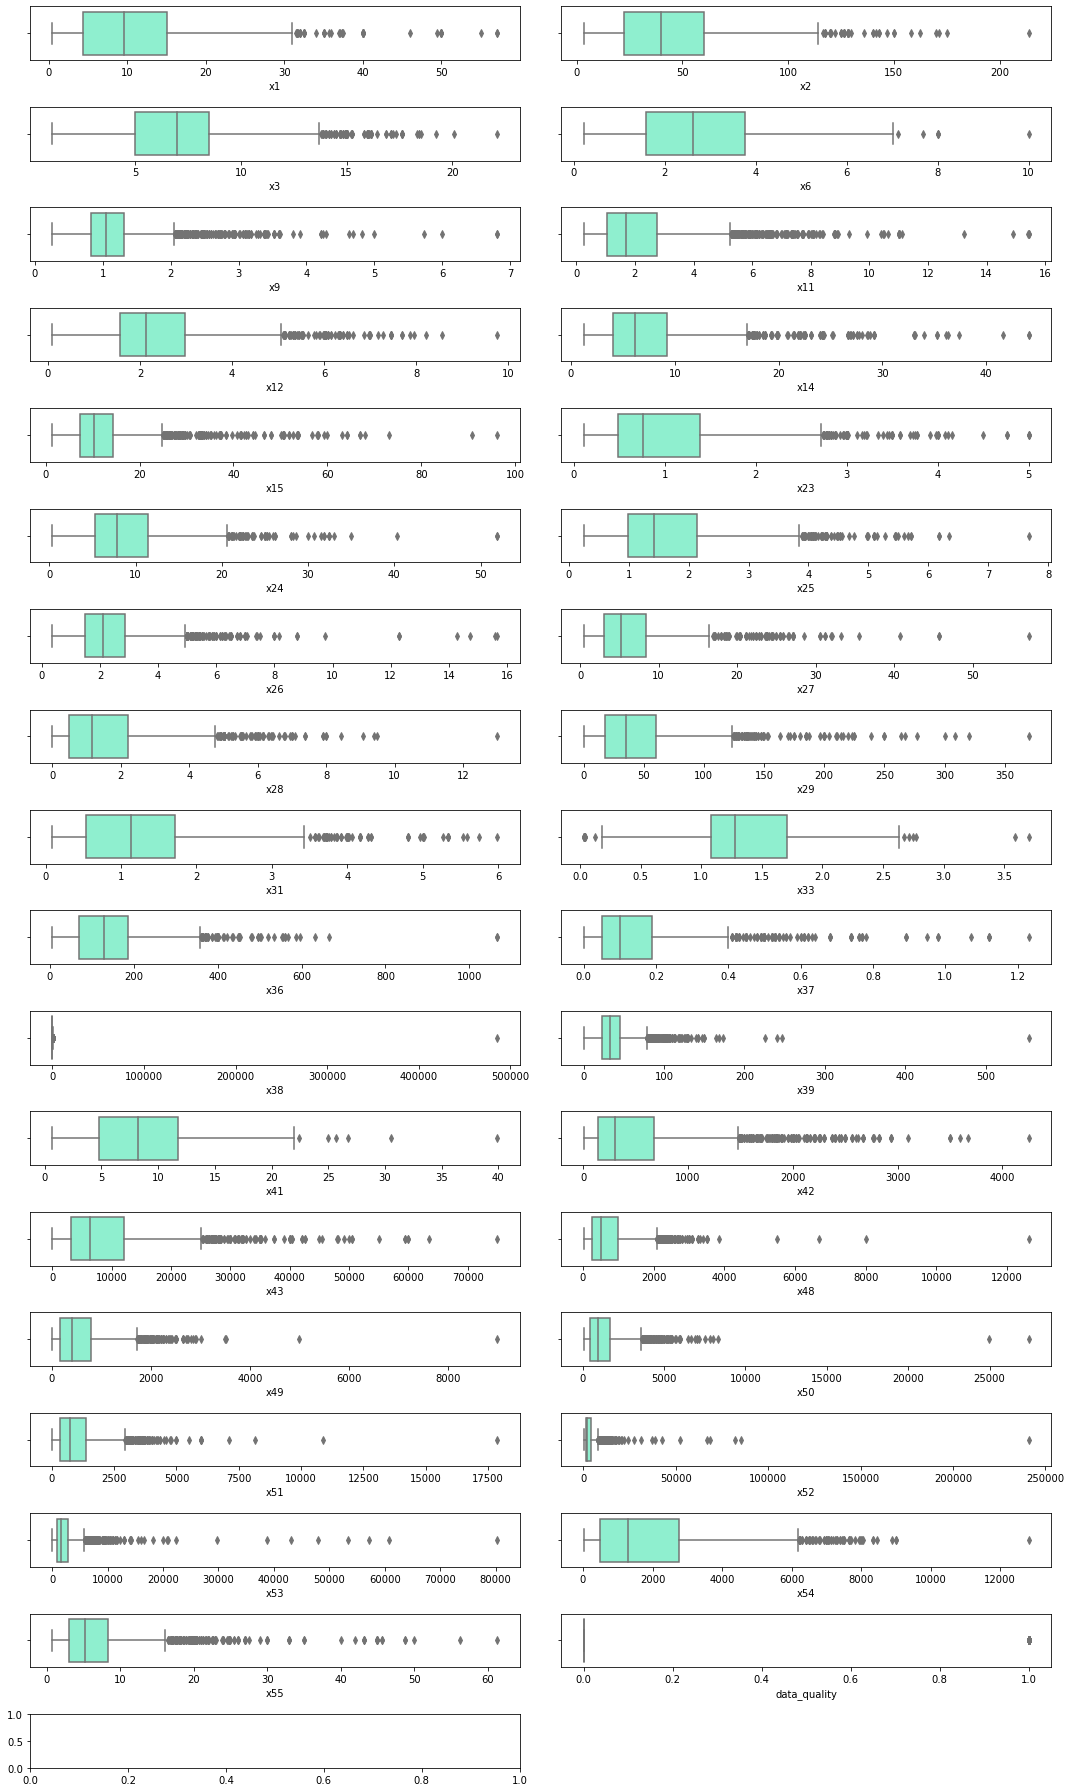

In [24]:
fig, axes = plt.subplots(18, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()